In [1]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# load_data
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [3]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((60000, 28, 28), (10000, 28, 28), (60000,), (10000,))

In [4]:
# 2차원 -> 3차원 변환, 가로 * 세로 * rgb
X_train = X_train.reshape(60000, 28, 28, 1)
X_test = X_test.reshape(10000, 28, 28, 1)

# 실수화
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

# 정규화
X_train = X_train / 255
X_test = X_test / 255

In [5]:
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [6]:
model = Sequential()
model.add(Conv2D(32, (3, 3), input_shape=(28, 28, 1), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(32, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(10, activation='softmax'))

/opt/anaconda3/envs/dev/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [7]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [8]:
# 모델 최적화를 위한 설정 구간
modelpath= './model_storage/MNIST_MLP_2.keras'
checkpointer = ModelCheckpoint(filepath=modelpath, monitor='val_loss',
               verbose=1, save_best_only=True)
early_stopping_callback = EarlyStopping(monitor='val_loss', patience=10)

In [9]:
# 모델을 실행
history = model.fit(X_train, y_train, validation_split=0.25, epochs=30, 
         batch_size=200, verbose=1, callbacks=[checkpointer, early_stopping_callback])

Epoch 1/30
224/225 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.7921 - loss: 0.7936
Epoch 1: val_loss improved from inf to 0.13072, saving model to ./model_storage/MNIST_MLP_2.keras
225/225 ━━━━━━━━━━━━━━━━━━━━ 5s 19ms/step - accuracy: 0.7931 - loss: 0.7898 - val_accuracy: 0.9614 - val_loss: 0.1307
Epoch 2/30
225/225 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.9704 - loss: 0.0955
Epoch 2: val_loss improved from 0.13072 to 0.07401, saving model to ./model_storage/MNIST_MLP_2.keras
225/225 ━━━━━━━━━━━━━━━━━━━━ 4s 20ms/step - accuracy: 0.9705 - loss: 0.0955 - val_accuracy: 0.9763 - val_loss: 0.0740
Epoch 3/30
223/225 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.9819 - loss: 0.0579
Epoch 3: val_loss improved from 0.07401 to 0.06379, saving model to ./model_storage/MNIST_MLP_2.keras
225/225 ━━━━━━━━━━━━━━━━━━━━ 5s 20ms/step - accuracy: 0.9819 - loss: 0.0579 - val_accuracy: 0.9798 - val_loss: 0.0638
Epoch 4/30
224/225 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.9859 - loss: 0.0

In [10]:
# 검증셋과 학습셋의 오차를 저장
y_vloss = history.history['val_loss']
y_loss = history.history['loss']

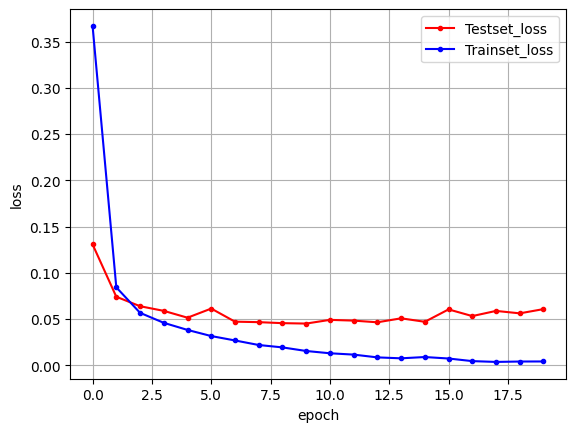

In [11]:
# 그래프로 표현
x_len = np.arange(len(y_loss))
plt.plot(x_len, y_vloss, marker='.', c="red", label='Testset_loss')
plt.plot(x_len, y_loss, marker='.', c="blue", label='Trainset_loss')

# 그래프에 그리드를 주고 레이블을 표시
plt.legend(loc='upper right')
plt.grid()
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()